In [1]:
#Import library yang dibutuhkan
from keras.applications.efficientnet_v2 import EfficientNetV2M
from keras.applications.mobilenet_v2 import MobileNetV2

#Deklarasikan model yang akan dipakai
model = EfficientNetV2M()
#model = MobileNetV2()

#Tampilkan layer-layer model VGG16
model.summary()

c:\Users\Swift\AppData\Local\Programs\Python\Python39\lib\site-packages\requests-2.27.1-py3.9.egg\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.1.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


Model: "efficientnetv2-m"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 480, 480, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 480, 480, 3)  0           ['input_1[0][0]']                
                                                                                                  
 stem_conv (Conv2D)             (None, 240, 240, 24  648         ['rescaling[0][0]']              
                                )                                                                 
                                                                                   

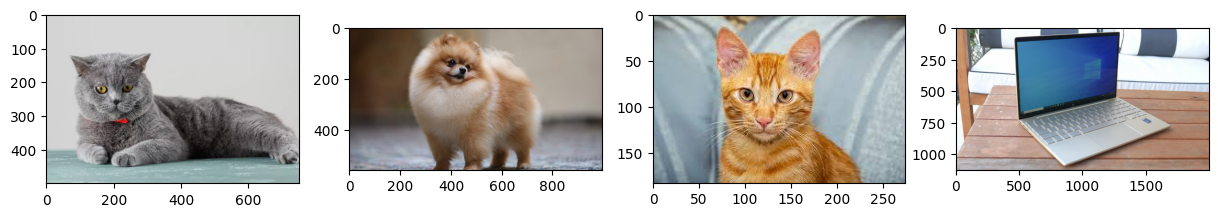

(4, 480, 480, 3)


In [2]:
import requests
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image

urls=[]

urls.append("https://assets.ayobandung.com/crop/0x0:0x0/750x500/webp/photo/2022/10/15/366382835.jpg")
urls.append("https://www.purina.co.id/sites/default/files/2023-02/Mengenali%20Jenis%20Anjing%20Pomeranian%20copy.jpg")
urls.append("https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQPXBxsqLx2gkepVIe9uytyY9A_qoeqmhh5XQ&usqp=CAU")
urls.append("https://cdn.mos.cms.futurecdn.net/2XcW8BYBLE4Uy5he8poY3L.jpg")


imgs=[]
plt.figure(figsize=(15,6))
for u in range(0,len(urls)):
  r = requests.get(urls[u], stream=True) #Download
  img = np.array(Image.open(r.raw))  #Konversi ke NP Array
  plt.subplot(1,len(urls),u+1) #Menampilkan ke matplotlib
  plt.imshow(img) #Menampilkan ke matplotlib
  img = cv2.resize(img, (480,480)) #Resize sesuai input VGG 16
  imgs.append(img) #Kumpulkan semua image yang telah di preproses ke imgs
plt.show() #Menampilkan ke matplotlib
imgs = np.array(imgs) #Konversi ke Np Array 
print (imgs.shape) #Debuging (Apakah shape-nya benar?)

In [3]:
yh = model.predict(imgs)
for i in range(len(urls)):
  if(np.argmax(yh[i]) >= 151 and np.argmax(yh[i])<=268 ):
      print("Anjing")
  elif(np.argmax(yh[i]) >= 281 and np.argmax(yh[i])<=287 ) :
      print("Kucing")
  elif(np.argmax(yh[i]) >= 7 and np.argmax(yh[i])<=8 ) :
      print("Ayam")
  elif(np.argmax(yh[i]) >= 387 and np.argmax(yh[i]) <=388):
      print("Panda")
  elif(np.argmax(yh[i]) == 671):
      print("Sepeda") 
  elif(np.argmax(yh[i]) == 620):
      print("Laptop") 
  else:
      print("Lainya")

1/1 [==============================] - 11s 11s/step
Kucing
Anjing
Kucing
Lainya
